# Case 1 : lightgbm을 사용한 경우

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
!pip install lightgbm

In [3]:
!pip install shap

In [4]:
df=pd.read_excel('가중치분석.xlsx')
df.head()

,상품명,일매출변동점수,조회수 변동 점수,등록일 점수,이윤 점수,조회수 점수,장바구니 점수,판매율(구매전환율) 점수,욕망지표(구매의사),긍정확률,주문결함 점수,종합 점수
0,드민 플라워 쉬폰롱원피스,418819.047619,-1.0,15,1279200.0,4941.0,2581200.0,793.280712,0.010929,0.860302,0,4.284968e+06
1,[La belle rose]레이니 찰랑 미니 훌원피스,297361.904762,884.0,15,840500.0,5121.0,3546200.0,477.172427,0.023238,0.935579,4,4.690564e+06
2,[La belle rose]로제 스퀘어 미니훌원피스,109923.809524,-124.0,15,754000.0,4171.0,1910400.0,496.187965,0.011508,0.875293,8,2.778891e+06
3,[La belle rose]드로우 셔링 롱원피스,96238.095238,304.0,15,478800.0,2732.0,799000.0,481.698389,0.006223,0.882879,5,1.377577e+06
4,[La belle rose]딘트 체크 스퀘어원피스,95238.095238,-40.0,15,426300.0,2421.0,1960000.0,479.140851,0.020240,0.794134,10,2.484424e+06


In [5]:
df.shape

(365, 12)

In [6]:
df.tail()

,상품명,일매출변동점수,조회수 변동 점수,등록일 점수,이윤 점수,조회수 점수,장바구니 점수,판매율(구매전환율) 점수,욕망지표(구매의사),긍정확률,주문결함 점수,종합 점수
360,바닐라 헤어밴드,1638.095238,NaN,15,5150.0,55.0,0.0,156.363636,0.000000,0.990803,0,NaN
361,바비 귀걸이,1142.857143,-3.0,15,3700.0,7.0,6000.0,857.142857,0.142857,0.864181,0,11720.107039
362,프에 귀걸이,952.380952,0.0,15,3275.0,13.0,10000.0,384.615385,0.153846,0.943593,0,14641.193776
363,사은품,0.000000,NaN,15,0.0,NaN,NaN,NaN,NaN,NaN,1,NaN
364,개별송장,0.000000,NaN,15,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN


In [7]:
dfn=df.dropna(axis=0)
dfn.head(3)

,상품명,일매출변동점수,조회수 변동 점수,등록일 점수,이윤 점수,조회수 점수,장바구니 점수,판매율(구매전환율) 점수,욕망지표(구매의사),긍정확률,주문결함 점수,종합 점수
0,드민 플라워 쉬폰롱원피스,418819.047619,-1.0,15,1279200.0,4941.0,2581200.0,793.280712,0.010929,0.860302,0,4.284968e+06
1,[La belle rose]레이니 찰랑 미니 훌원피스,297361.904762,884.0,15,840500.0,5121.0,3546200.0,477.172427,0.023238,0.935579,4,4.690564e+06
2,[La belle rose]로제 스퀘어 미니훌원피스,109923.809524,-124.0,15,754000.0,4171.0,1910400.0,496.187965,0.011508,0.875293,8,2.778891e+06


In [8]:
dfn.shape

(343, 12)

In [9]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 362
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   상품명            343 non-null    object 
 1   일매출변동점수        343 non-null    float64
 2   조회수 변동 점수      343 non-null    float64
 3   등록일 점수         343 non-null    int64  
 4   이윤 점수          343 non-null    float64
 5   조회수 점수         343 non-null    float64
 6   장바구니 점수        343 non-null    float64
 7   판매율(구매전환율) 점수  343 non-null    float64
 8   욕망지표(구매의사)     343 non-null    float64
 9   긍정확률           343 non-null    float64
 10  주문결함 점수        343 non-null    int64  
 11  종합 점수          343 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 34.8+ KB


In [10]:
dfnc=dfn.copy()
dfnc.head(3)

,상품명,일매출변동점수,조회수 변동 점수,등록일 점수,이윤 점수,조회수 점수,장바구니 점수,판매율(구매전환율) 점수,욕망지표(구매의사),긍정확률,주문결함 점수,종합 점수
0,드민 플라워 쉬폰롱원피스,418819.047619,-1.0,15,1279200.0,4941.0,2581200.0,793.280712,0.010929,0.860302,0,4.284968e+06
1,[La belle rose]레이니 찰랑 미니 훌원피스,297361.904762,884.0,15,840500.0,5121.0,3546200.0,477.172427,0.023238,0.935579,4,4.690564e+06
2,[La belle rose]로제 스퀘어 미니훌원피스,109923.809524,-124.0,15,754000.0,4171.0,1910400.0,496.187965,0.011508,0.875293,8,2.778891e+06


In [53]:
dfnc.loc[:,'상품명'] = dfnc.loc[:,'상품명'].astype('category').cat.codes

In [54]:
dfnc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 362
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   상품명            343 non-null    int16  
 1   일매출변동점수        343 non-null    float64
 2   조회수 변동 점수      343 non-null    float64
 3   등록일 점수         343 non-null    int64  
 4   이윤 점수          343 non-null    float64
 5   조회수 점수         343 non-null    float64
 6   장바구니 점수        343 non-null    float64
 7   판매율(구매전환율) 점수  343 non-null    float64
 8   욕망지표(구매의사)     343 non-null    float64
 9   긍정확률           343 non-null    float64
 10  주문결함 점수        343 non-null    int64  
 11  종합 점수          343 non-null    float64
dtypes: float64(9), int16(1), int64(2)
memory usage: 32.8 KB


In [55]:
X=dfnc.drop('종합 점수',axis=1)
y=dfnc['종합 점수']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((274, 11), (69, 11), (274,), (69,))

In [56]:
import lightgbm as lgb  # 없을 경우 cmd/anaconda prompt에서 install
from math import sqrt
from sklearn.metrics import mean_squared_error

# lightgbm model
lgb_dtrain = lgb.Dataset(data = X_train, label = y_train) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10,
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(X_test) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, y_test)))) # RMSE

C:\anaconda\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 274, number of used features: 10
[LightGBM] [Info] Start training from score 236768.460056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [57]:
import shap
explainer = shap.TreeExplainer(lgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(X_test)

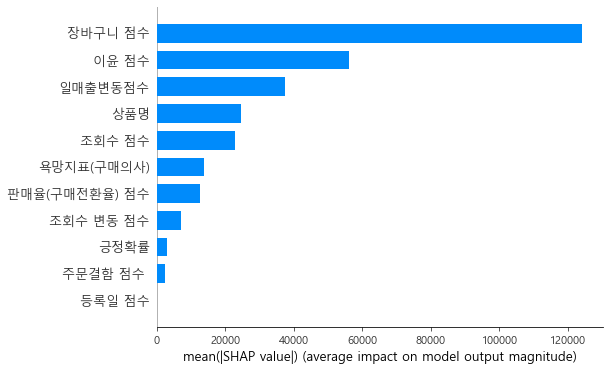

In [61]:
from matplotlib import font_manager,rc
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)
shap.summary_plot(shap_values, X_test, plot_type = "bar")

# Case 2 : mglearn을 사용한 경우

In [62]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [158]:
df=pd.read_excel('가중치분석.xlsx')
df.head()

,상품명,일매출변동점수,조회수 변동 점수,등록일 점수,이윤 점수,조회수 점수,장바구니 점수,판매율(구매전환율) 점수,욕망지표(구매의사),긍정확률,주문결함 점수,종합 점수
0,드민 플라워 쉬폰롱원피스,418819.047619,-1.0,15,1279200.0,4941.0,2581200.0,793.280712,0.010929,0.860302,0,4.284968e+06
1,[La belle rose]레이니 찰랑 미니 훌원피스,297361.904762,884.0,15,840500.0,5121.0,3546200.0,477.172427,0.023238,0.935579,4,4.690564e+06
2,[La belle rose]로제 스퀘어 미니훌원피스,109923.809524,-124.0,15,754000.0,4171.0,1910400.0,496.187965,0.011508,0.875293,8,2.778891e+06
3,[La belle rose]드로우 셔링 롱원피스,96238.095238,304.0,15,478800.0,2732.0,799000.0,481.698389,0.006223,0.882879,5,1.377577e+06
4,[La belle rose]딘트 체크 스퀘어원피스,95238.095238,-40.0,15,426300.0,2421.0,1960000.0,479.140851,0.020240,0.794134,10,2.484424e+06


In [159]:
dfnc=dfn.copy()
dfnc.head(3)

,상품명,일매출변동점수,조회수 변동 점수,등록일 점수,이윤 점수,조회수 점수,장바구니 점수,판매율(구매전환율) 점수,욕망지표(구매의사),긍정확률,주문결함 점수,종합 점수
0,드민 플라워 쉬폰롱원피스,418819.047619,-1.0,15,1279200.0,4941.0,2581200.0,793.280712,0.010929,0.860302,0,4.284968e+06
1,[La belle rose]레이니 찰랑 미니 훌원피스,297361.904762,884.0,15,840500.0,5121.0,3546200.0,477.172427,0.023238,0.935579,4,4.690564e+06
2,[La belle rose]로제 스퀘어 미니훌원피스,109923.809524,-124.0,15,754000.0,4171.0,1910400.0,496.187965,0.011508,0.875293,8,2.778891e+06


In [160]:
dfnc.loc[:,'상품명'] = dfnc.loc[:,'상품명'].astype('category').cat.codes

dfnc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 362
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   상품명            343 non-null    int16  
 1   일매출변동점수        343 non-null    float64
 2   조회수 변동 점수      343 non-null    float64
 3   등록일 점수         343 non-null    int64  
 4   이윤 점수          343 non-null    float64
 5   조회수 점수         343 non-null    float64
 6   장바구니 점수        343 non-null    float64
 7   판매율(구매전환율) 점수  343 non-null    float64
 8   욕망지표(구매의사)     343 non-null    float64
 9   긍정확률           343 non-null    float64
 10  주문결함 점수        343 non-null    int64  
 11  종합 점수          343 non-null    float64
dtypes: float64(9), int16(1), int64(2)
memory usage: 32.8 KB


In [161]:
dfnc['종합 점수']

0      4.284968e+06
1      4.690564e+06
2      2.778891e+06
3      1.377577e+06
4      2.484424e+06
           ...     
356    1.582578e+04
357    7.987656e+03
358    4.110511e+04
361    1.172011e+04
362    1.464119e+04
Name: 종합 점수, Length: 343, dtype: float64

In [162]:
# Continous 해결
from sklearn import preprocessing
from sklearn import utils

lab_enc=preprocessing.LabelEncoder()
encoded=lab_enc.fit_transform(y_train)

print(utils.multiclass.type_of_target(y_train.astype('float64')))

continuous


In [168]:
def scoring(x):
    if x<=1000000:
        return 0
    elif x<=2000000:
        return 1
    elif x<=3000000:
        return 2
    elif x<=4000000:
        return 3
    else:
        return 4

In [169]:
dfnc['종합 점수']=dfnc['종합 점수'].apply(scoring)

In [170]:
dfnc['종합 점수']

0      4
1      4
2      2
3      1
4      2
      ..
356    0
357    0
358    0
361    0
362    0
Name: 종합 점수, Length: 343, dtype: int64

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np


# 훈련/테스트 세트로 나누기'
feature=['종합 점수']
X=dfnc.drop(feature,axis=1)
y=np.asarray(dfnc['종합 점수'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
forest = RandomForestClassifier(n_estimators=100)
#오류발생부분
#forest.fit(X_train,y_train)

In [172]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [179]:
dfnc['등록일 점수']

0      15
1      15
2      15
3      15
4      15
       ..
356    15
357    15
358    15
361    15
362    15
Name: 등록일 점수, Length: 343, dtype: int64

In [178]:
forest.feature_importances_

array([0.03584147, 0.16094729, 0.04934998, 0.        , 0.12873168,
       0.14623896, 0.37169782, 0.01542917, 0.02278299, 0.03286054,
       0.0361201 ])

In [180]:
n_features

12

<BarContainer object of 11 artists>

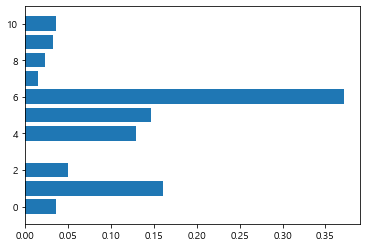

In [182]:
plt.barh(range(11), forest.feature_importances_, align='center')

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 1.000
특성 중요도 : 
[0.03584147 0.16094729 0.04934998 0.         0.12873168 0.14623896
 0.37169782 0.01542917 0.02278299 0.03286054 0.0361201 ]


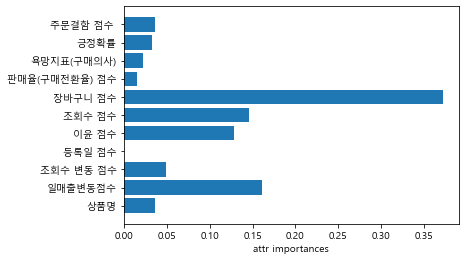

In [193]:

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

# 특성 중요도
print("특성 중요도 : \n{}".format(forest.feature_importances_))
# 특성 중요도 시각화 하기
def plot_feature_importances_cancer(model):
    n_features = 11
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),dfnc.columns[:11])
    plt.xlabel("attr importances")
    plt.ylim(-1, n_features)
plt.show()

plot_feature_importances_cancer(forest)

# Case 3

In [194]:
!pip install xgboost

In [195]:
import xgboost

print(xgboost.__version__)

1.3.3


In [196]:
df=pd.read_excel('가중치분석.xlsx')
dfn=df.dropna(axis=0)
dfn.head(3)

,상품명,일매출변동점수,조회수 변동 점수,등록일 점수,이윤 점수,조회수 점수,장바구니 점수,판매율(구매전환율) 점수,욕망지표(구매의사),긍정확률,주문결함 점수,종합 점수
0,드민 플라워 쉬폰롱원피스,418819.047619,-1.0,15,1279200.0,4941.0,2581200.0,793.280712,0.010929,0.860302,0,4.284968e+06
1,[La belle rose]레이니 찰랑 미니 훌원피스,297361.904762,884.0,15,840500.0,5121.0,3546200.0,477.172427,0.023238,0.935579,4,4.690564e+06
2,[La belle rose]로제 스퀘어 미니훌원피스,109923.809524,-124.0,15,754000.0,4171.0,1910400.0,496.187965,0.011508,0.875293,8,2.778891e+06


In [197]:
dfnc=dfn.copy()
dfnc.loc[:,'상품명'] = dfnc.loc[:,'상품명'].astype('category').cat.codes
dfnc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 362
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   상품명            343 non-null    int16  
 1   일매출변동점수        343 non-null    float64
 2   조회수 변동 점수      343 non-null    float64
 3   등록일 점수         343 non-null    int64  
 4   이윤 점수          343 non-null    float64
 5   조회수 점수         343 non-null    float64
 6   장바구니 점수        343 non-null    float64
 7   판매율(구매전환율) 점수  343 non-null    float64
 8   욕망지표(구매의사)     343 non-null    float64
 9   긍정확률           343 non-null    float64
 10  주문결함 점수        343 non-null    int64  
 11  종합 점수          343 non-null    float64
dtypes: float64(9), int16(1), int64(2)
memory usage: 32.8 KB


In [210]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [211]:
def scoring(x):
    if x<=1000000:
        return 0
    elif x<=2000000:
        return 1
    elif x<=3000000:
        return 2
    elif x<=4000000:
        return 3
    else:
        return 4

dfnc['종합 점수']=dfnc['종합 점수'].apply(scoring)

In [212]:
X=dfnc.drop('종합 점수',axis=1)
y=dfnc['종합 점수']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [213]:
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [223]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'multi:softmax',
           'eval_metric':'mlogloss',
            'num_class' : 5
        }
num_rounds = 400

In [224]:
# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다. 
wlist = [(dtrain,'train'),(dtest,'eval') ]

In [225]:
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , \
                      early_stopping_rounds=100, evals=wlist )

[0]	train-mlogloss:1.37450	eval-mlogloss:1.37234
[1]	train-mlogloss:1.19271	eval-mlogloss:1.18908
[2]	train-mlogloss:1.04552	eval-mlogloss:1.04077
[3]	train-mlogloss:0.92272	eval-mlogloss:0.91734
[4]	train-mlogloss:0.81853	eval-mlogloss:0.81267
[5]	train-mlogloss:0.72893	eval-mlogloss:0.72273
[6]	train-mlogloss:0.65115	eval-mlogloss:0.64469
[7]	train-mlogloss:0.58310	eval-mlogloss:0.57648
[8]	train-mlogloss:0.52324	eval-mlogloss:0.51651
[9]	train-mlogloss:0.47034	eval-mlogloss:0.46355
[10]	train-mlogloss:0.42341	eval-mlogloss:0.41661
[11]	train-mlogloss:0.38166	eval-mlogloss:0.37487
[12]	train-mlogloss:0.34443	eval-mlogloss:0.33768
[13]	train-mlogloss:0.31129	eval-mlogloss:0.30481
[14]	train-mlogloss:0.28162	eval-mlogloss:0.27510
[15]	train-mlogloss:0.25500	eval-mlogloss:0.24874
[16]	train-mlogloss:0.23110	eval-mlogloss:0.22484
[17]	train-mlogloss:0.20961	eval-mlogloss:0.20360
[18]	train-mlogloss:0.19026	eval-mlogloss:0.18428
[19]	train-mlogloss:0.17284	eval-mlogloss:0.16710
[20]	train

[163]	train-mlogloss:0.00687	eval-mlogloss:0.00434
[164]	train-mlogloss:0.00687	eval-mlogloss:0.00434
[165]	train-mlogloss:0.00687	eval-mlogloss:0.00434
[166]	train-mlogloss:0.00687	eval-mlogloss:0.00434
[167]	train-mlogloss:0.00686	eval-mlogloss:0.00434
[168]	train-mlogloss:0.00686	eval-mlogloss:0.00433
[169]	train-mlogloss:0.00686	eval-mlogloss:0.00433
[170]	train-mlogloss:0.00686	eval-mlogloss:0.00433
[171]	train-mlogloss:0.00686	eval-mlogloss:0.00433
[172]	train-mlogloss:0.00685	eval-mlogloss:0.00433
[173]	train-mlogloss:0.00685	eval-mlogloss:0.00432
[174]	train-mlogloss:0.00685	eval-mlogloss:0.00432
[175]	train-mlogloss:0.00685	eval-mlogloss:0.00432
[176]	train-mlogloss:0.00685	eval-mlogloss:0.00432
[177]	train-mlogloss:0.00685	eval-mlogloss:0.00432
[178]	train-mlogloss:0.00685	eval-mlogloss:0.00432
[179]	train-mlogloss:0.00684	eval-mlogloss:0.00431
[180]	train-mlogloss:0.00684	eval-mlogloss:0.00431
[181]	train-mlogloss:0.00684	eval-mlogloss:0.00431
[182]	train-mlogloss:0.00684	ev

[324]	train-mlogloss:0.00665	eval-mlogloss:0.00415
[325]	train-mlogloss:0.00665	eval-mlogloss:0.00415
[326]	train-mlogloss:0.00665	eval-mlogloss:0.00415
[327]	train-mlogloss:0.00665	eval-mlogloss:0.00415
[328]	train-mlogloss:0.00665	eval-mlogloss:0.00415
[329]	train-mlogloss:0.00665	eval-mlogloss:0.00415
[330]	train-mlogloss:0.00665	eval-mlogloss:0.00415
[331]	train-mlogloss:0.00665	eval-mlogloss:0.00415
[332]	train-mlogloss:0.00665	eval-mlogloss:0.00415
[333]	train-mlogloss:0.00665	eval-mlogloss:0.00415
[334]	train-mlogloss:0.00664	eval-mlogloss:0.00415
[335]	train-mlogloss:0.00664	eval-mlogloss:0.00415
[336]	train-mlogloss:0.00664	eval-mlogloss:0.00415
[337]	train-mlogloss:0.00664	eval-mlogloss:0.00414
[338]	train-mlogloss:0.00664	eval-mlogloss:0.00414
[339]	train-mlogloss:0.00664	eval-mlogloss:0.00414
[340]	train-mlogloss:0.00664	eval-mlogloss:0.00414
[341]	train-mlogloss:0.00664	eval-mlogloss:0.00414
[342]	train-mlogloss:0.00664	eval-mlogloss:0.00414
[343]	train-mlogloss:0.00664	ev

In [230]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10],3))
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
예측값 10개만 표시: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [231]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [232]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[67  0]
 [ 0  2]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000,    F1: 1.0000, AUC:1.0000


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

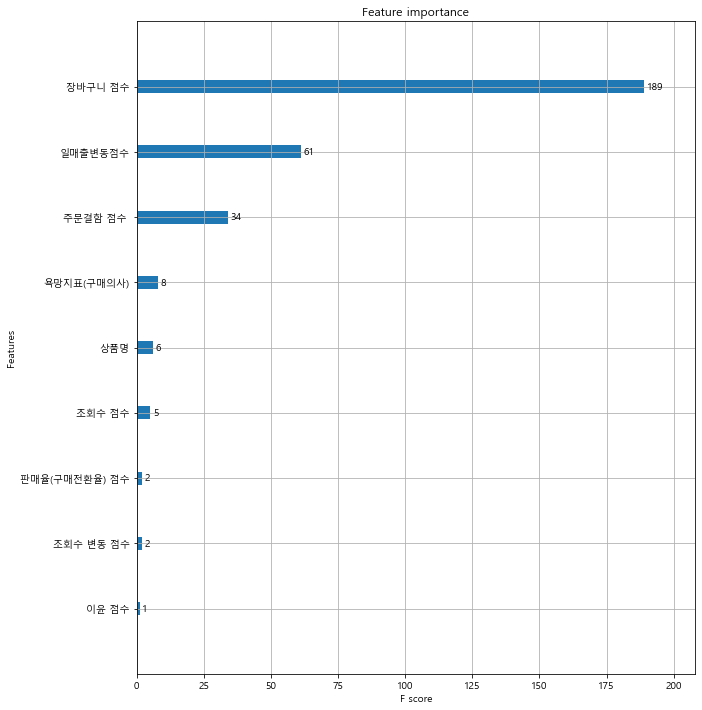

In [233]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [13]:
df=pd.read_excel('가중치분석.xlsx')
dfn=df.dropna(axis=0)
dfn.head(3)

,상품명,일매출변동점수,조회수 변동 점수,등록일 점수,이윤 점수,조회수 점수,장바구니 점수,판매율(구매전환율) 점수,욕망지표(구매의사),긍정확률,주문결함 점수,종합 점수
0,드민 플라워 쉬폰롱원피스,418819.047619,-1.0,15,1279200.0,4941.0,2581200.0,793.280712,0.010929,0.860302,0,4.284968e+06
1,[La belle rose]레이니 찰랑 미니 훌원피스,297361.904762,884.0,15,840500.0,5121.0,3546200.0,477.172427,0.023238,0.935579,4,4.690564e+06
2,[La belle rose]로제 스퀘어 미니훌원피스,109923.809524,-124.0,15,754000.0,4171.0,1910400.0,496.187965,0.011508,0.875293,8,2.778891e+06


In [14]:
dfnc=dfn.copy()
dfnc.loc[:,'상품명'] = dfnc.loc[:,'상품명'].astype('category').cat.codes
dfnc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 362
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   상품명            343 non-null    int16  
 1   일매출변동점수        343 non-null    float64
 2   조회수 변동 점수      343 non-null    float64
 3   등록일 점수         343 non-null    int64  
 4   이윤 점수          343 non-null    float64
 5   조회수 점수         343 non-null    float64
 6   장바구니 점수        343 non-null    float64
 7   판매율(구매전환율) 점수  343 non-null    float64
 8   욕망지표(구매의사)     343 non-null    float64
 9   긍정확률           343 non-null    float64
 10  주문결함 점수        343 non-null    int64  
 11  종합 점수          343 non-null    float64
dtypes: float64(9), int16(1), int64(2)
memory usage: 32.8 KB


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
dfnc[:]=scaler.fit_transform(dfnc[:])
dfnc.head()

,상품명,일매출변동점수,조회수 변동 점수,등록일 점수,이윤 점수,조회수 점수,장바구니 점수,판매율(구매전환율) 점수,욕망지표(구매의사),긍정확률,주문결함 점수,종합 점수
0,0.263158,1.000000,0.248088,0.0,1.000000,0.964837,0.727878,0.043954,0.032787,0.828524,0.0,0.913543
1,0.055556,0.737593,1.000000,0.0,0.656171,1.000000,1.000000,0.022682,0.069713,0.926004,0.4,1.000000
2,0.070175,0.332634,0.143585,0.0,0.588377,0.814417,0.538718,0.023961,0.034524,0.847936,0.8,0.592506
3,0.043860,0.303066,0.507222,0.0,0.372690,0.533307,0.225312,0.022986,0.018668,0.857759,0.5,0.293801
4,0.049708,0.300905,0.214953,0.0,0.331544,0.472553,0.552704,0.022814,0.060719,0.742841,1.0,0.529738


In [16]:
dfnc.head(10)

,상품명,일매출변동점수,조회수 변동 점수,등록일 점수,이윤 점수,조회수 점수,장바구니 점수,판매율(구매전환율) 점수,욕망지표(구매의사),긍정확률,주문결함 점수,종합 점수
0,0.263158,1.000000,0.248088,0.0,1.000000,0.964837,0.727878,0.043954,0.032787,0.828524,0.0,0.913543
1,0.055556,0.737593,1.000000,0.0,0.656171,1.000000,1.000000,0.022682,0.069713,0.926004,0.4,1.000000
2,0.070175,0.332634,0.143585,0.0,0.588377,0.814417,0.538718,0.023961,0.034524,0.847936,0.8,0.592506
3,0.043860,0.303066,0.507222,0.0,0.372690,0.533307,0.225312,0.022986,0.018668,0.857759,0.5,0.293801
4,0.049708,0.300905,0.214953,0.0,0.331544,0.472553,0.552704,0.022814,0.060719,0.742841,1.0,0.529738
5,0.026316,0.259753,0.195412,0.0,0.318298,0.142411,0.246743,0.096438,0.143639,0.948916,0.0,0.290662
6,0.929825,0.201070,0.113849,0.0,0.288830,0.285212,0.240088,0.037962,0.088235,0.657330,0.4,0.271777
7,0.160819,0.243251,0.212404,0.0,0.448870,0.210002,0.356043,0.049555,0.298050,0.785013,0.2,0.407097
8,0.423977,0.256255,0.214953,0.0,0.211396,0.107052,0.091365,0.083071,0.065455,0.885444,0.6,0.143715
9,0.008772,0.239588,0.203059,0.0,0.224014,0.127369,0.038069,0.068361,0.022936,0.673378,0.1,0.105187
